## Problem statement: 

The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.


## Import Libraries:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split as split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


from warnings import filterwarnings
filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
matplotlib.rcParams['font.size']=11
matplotlib.rcParams['figure.figsize']=(12, 6)

## Reading Data:

In [2]:
data = pd.read_excel("../data/DS - Assignment Part 1 data set.xlsx")
data.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,3,828,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,3,1115,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,3,1316,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,1,588,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,2,1075,22.1


In [3]:
data.drop(columns="Transaction date", inplace=True)

## EDA:

In [4]:
data.isna().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
House Age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
Number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Number of bedrooms,414.0,1.987923,0.818875,1.00000,1.000000,2.00000,3.000000,3.00000
House size (sqft),414.0,931.475845,348.910269,402.00000,548.000000,975.00000,1234.750000,1500.00000
House price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


## Visualization:

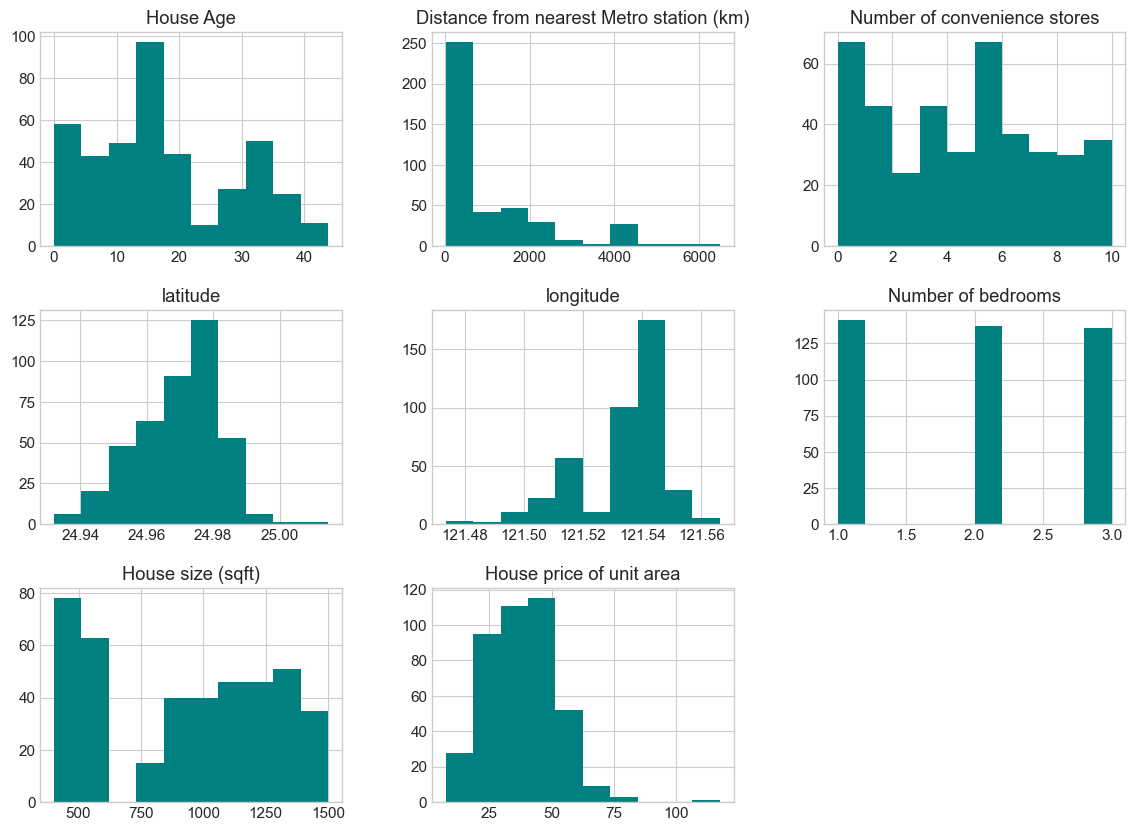

In [7]:
# -- Checking the distribution of the dataset --

data.hist(figsize=(14, 10), color = 'teal');

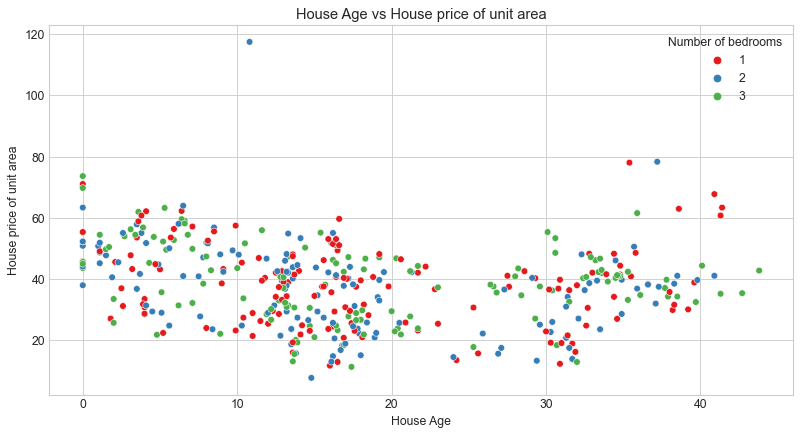

In [8]:
plt.figure(figsize=(12, 6), dpi=80)
sns.scatterplot(data = data, 
                x = data['House Age'], 
                y = data['House price of unit area'], 
                hue = data['Number of bedrooms'], 
                palette="Set1"
               )
plt.title("House Age vs House price of unit area")
plt.show()

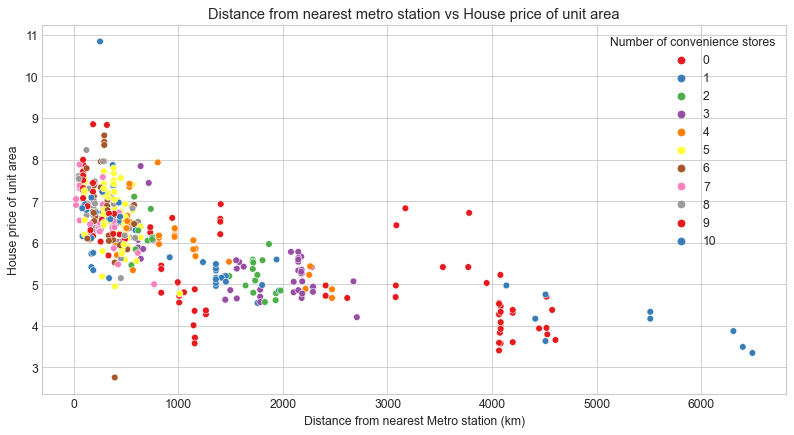

In [9]:
plt.figure(figsize=(12, 6), dpi=80)
sns.scatterplot(data = data, 
                x = data['Distance from nearest Metro station (km)'], 
                y = np.sqrt(data['House price of unit area']), 
                hue = data['Number of convenience stores'],
                palette="Set1"
               )
plt.title("Distance from nearest metro station vs House price of unit area")
plt.show()

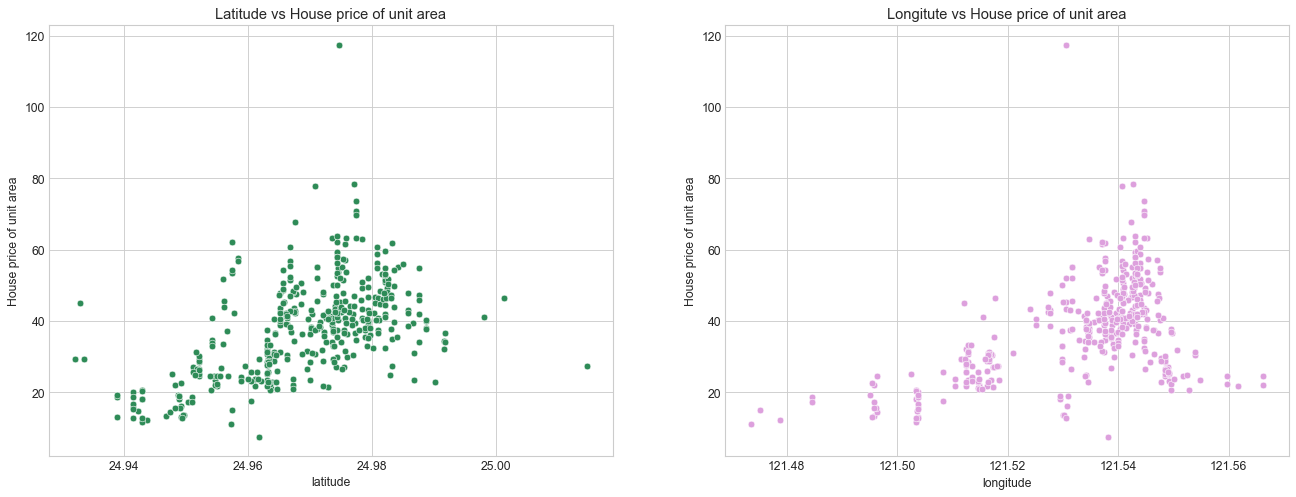

In [10]:
fig, ax = plt.subplots(figsize=(20, 7), dpi=80, nrows=1, ncols=2)

sns.scatterplot(ax = ax[0],
                data = data, 
                x = data['latitude'], 
                y = data['House price of unit area'], 
                color="seagreen",
               )

sns.scatterplot(ax = ax[1],
                data = data, 
                x = data['longitude'], 
                y = data['House price of unit area'], 
                color="plum"
               )

ax[0].set_title("Latitude vs House price of unit area")
ax[1].set_title("Longitute vs House price of unit area")
plt.show()

## Target column Transformed:

- Distribution of target variable in skewed().
- After transformation target looks normally distributed. 

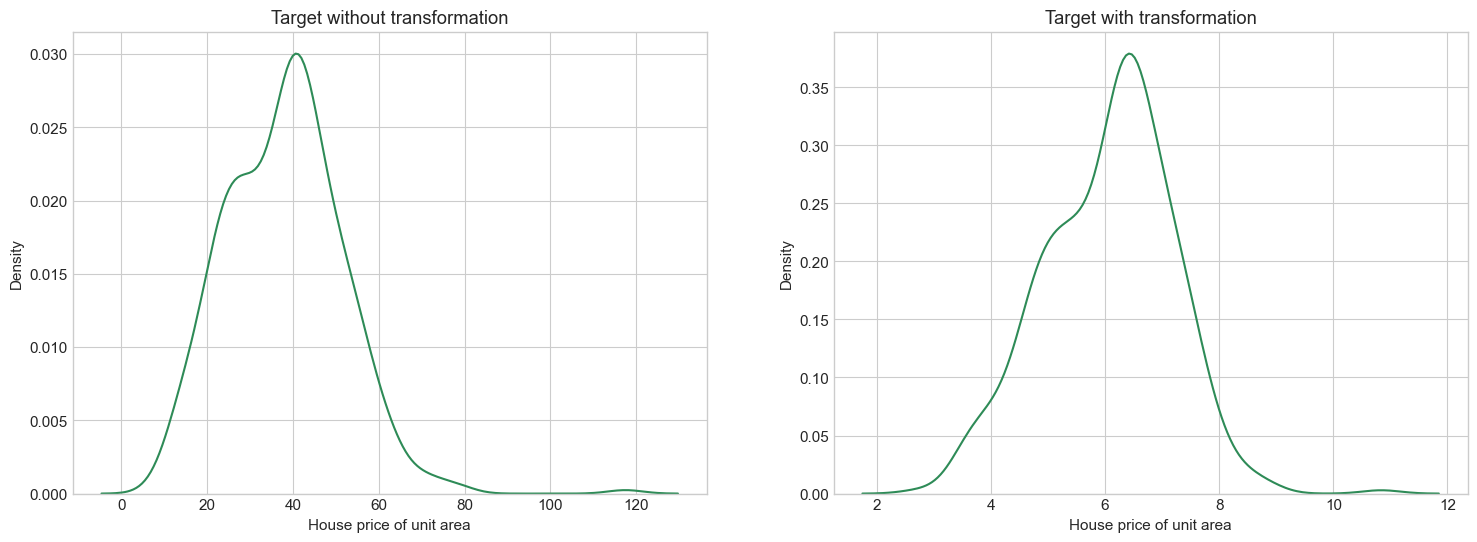

In [11]:
fig, ax = plt.subplots(figsize=(18, 6), nrows=1, ncols=2)
sns.kdeplot(ax=ax[0], data=data, x=data["House price of unit area"], color="seagreen");
sns.kdeplot(ax=ax[1], data=data, x=np.sqrt(data["House price of unit area"]), color="seagreen");
ax[0].set_title("Target without transformation")
ax[1].set_title("Target with transformation")
fig.show()

In [12]:
data.corr("pearson")

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [13]:
data.skew()

House Age                                   0.382926
Distance from nearest Metro station (km)    1.888757
Number of convenience stores                0.154607
latitude                                   -0.438598
longitude                                  -1.219591
Number of bedrooms                          0.022309
House size (sqft)                          -0.113627
House price of unit area                    0.599853
dtype: float64

In [14]:
data.shape

(414, 8)

## Data Normalization and data splitting:

In [15]:
# -- Separating features and target variable --
target = data.pop("House price of unit area")
target = np.sqrt(target)
inputs = data

# -- Way I prefer to normalize the numerical columns. 
num_cols = inputs.select_dtypes(include = np.number).columns.tolist()
scaler = StandardScaler().fit(inputs[num_cols])
inputs[num_cols] = scaler.transform(inputs[num_cols])

# -- splitting dataset into train & test --
train_inputs, test_inputs, train_target, test_target = split(inputs[num_cols], target,test_size=.20, random_state=42)

train_inputs.describe().loc[['min', 'max']]

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
min,-1.556639,-0.841279,-1.391638,-2.981805,-3.796886,-1.207899,-1.519349
max,2.292652,4.142735,2.007407,3.675611,2.146891,1.237432,1.631399


In [16]:
train_inputs.head(10)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
192,2.292652,-0.814143,0.987694,-0.123441,0.478119,1.237432,0.196632
234,-0.853573,0.898572,-0.032020,-0.722866,-1.288509,-1.207899,-1.255352
5,-0.932668,0.865586,-0.371925,-0.482451,-1.358313,1.237432,-0.296927
45,1.659892,-0.472056,1.327598,0.090352,0.755378,-1.207899,-1.031528
245,-0.897514,-0.352429,0.307885,0.286395,0.964137,0.014766,0.825060
346,-0.396579,0.498774,-0.711829,-0.396127,-1.086926,1.237432,1.344446
195,-0.220812,-0.494044,0.307885,-1.192403,0.426582,0.014766,0.429065
382,-0.124141,1.940115,-1.391638,-2.981805,-1.134549,-1.207899,-1.493523
400,0.798635,-0.476864,0.307885,0.427579,0.343730,1.237432,0.093329
296,-0.458097,0.048034,-0.032020,1.833769,0.078214,-1.207899,-0.994224


In [17]:
def rmse(target: pd.Series, predictions: np.ndarray) -> np.float64:
    """ returns root mean squared error in float value """
    return mean_squared_error(target, predictions, squared = False)

In [18]:
def model_metrics(inputs: pd.DataFrame, target: pd.Series, model, name: str) -> str:
    
    """ returns a performance summary/metrics of the model """

    preds = model.predict(inputs)
    print(f"---- {name} ----\n"
          f"RMSE: {rmse(target, preds):.3f}\n"
          f"Accuracy: {model.score(inputs, target):.3f}\n"
          f"R2 score: {r2_score(target, preds):.3f}"
         )

## Model fitting: 

In [19]:
lin_reg = LinearRegression(n_jobs = -1).fit(train_inputs, train_target)
ridge = Ridge(solver="svd").fit(train_inputs, train_target)
lasso = Lasso().fit(train_inputs, train_target)

In [20]:
# -- train set metrics --
model_metrics(train_inputs, train_target, lin_reg, "Training set")

---- Training set ----
RMSE: 0.695
Accuracy: 0.614
R2 score: 0.614


In [21]:
# -- test set metrics --
model_metrics(test_inputs, test_target, lin_reg, "Test set")

---- Test set ----
RMSE: 0.589
Accuracy: 0.724
R2 score: 0.724


In [22]:
# -- Ridge --
model_metrics(test_inputs, test_target, ridge, "Test set")

---- Test set ----
RMSE: 0.589
Accuracy: 0.724
R2 score: 0.724


In [23]:
# -- Lasso --
model_metrics(test_inputs, test_target, lasso, "Test set")

---- Test set ----
RMSE: 1.134
Accuracy: -0.023
R2 score: -0.023


- Lasso regression doesn't fit well as it shows __root mean squared error__: 10.023 on test set and accuracy is low as well. 
- Ridge shows good accuracy and has low errors on the test set.
- Linear regression falls behind ridge in terms of errors and accuracies. 

- Further, trying __DecisionTree__ regression and __RandomForest__ algorithms to see any changes in accuracy of the model.

## DecisionTree Regression:

In [24]:
tree = DecisionTreeRegressor(splitter='best', max_depth=2, random_state=42).fit(train_inputs, train_target)

model_metrics(train_inputs, train_target, tree, "Training set")

---- Training set ----
RMSE: 0.666
Accuracy: 0.645
R2 score: 0.645


In [25]:
# -- Test dataset --
model_metrics(test_inputs, test_target, tree, "Test set")

---- Test set ----
RMSE: 0.558
Accuracy: 0.753
R2 score: 0.753


In [26]:
tree2 = DecisionTreeRegressor(splitter='random', random_state=42).fit(train_inputs, train_target)
model_metrics(train_inputs, train_target, tree2, "Train set")

---- Train set ----
RMSE: 0.000
Accuracy: 1.000
R2 score: 1.000


In [27]:
# -- Test dataset --
model_metrics(test_inputs, test_target, tree2, "Test set")

---- Test set ----
RMSE: 0.697
Accuracy: 0.614
R2 score: 0.614


- tree2 model is overfitting here.
- Below I'm trying to see any changes in rmse and accuracy using ensemble regression models.

## Ensemble RandomForest Regression:

In [28]:
forest = RandomForestRegressor(max_depth=2, n_jobs=-1, random_state=42).fit(train_inputs, train_target)
model_metrics(train_inputs, train_target, forest, "Train set")

---- Train set ----
RMSE: 0.616
Accuracy: 0.697
R2 score: 0.697


In [29]:
# -- Test dataset --
model_metrics(test_inputs, test_target, forest, "Test set")

---- Test set ----
RMSE: 0.539
Accuracy: 0.769
R2 score: 0.769


## Feature Importance:

In [30]:
# -- Feature Importance by DecisionTree model --
importance = pd.DataFrame({'features': train_inputs.columns,
                           'importance': tree.feature_importances_}
                         )
importance.head(10).style.highlight_max(axis=0)

,features,importance
0,House Age,0.121727
1,Distance from nearest Metro station (km),0.801139
2,Number of convenience stores,0.000000
3,latitude,0.000000
4,longitude,0.077135
5,Number of bedrooms,0.000000
6,House size (sqft),0.000000


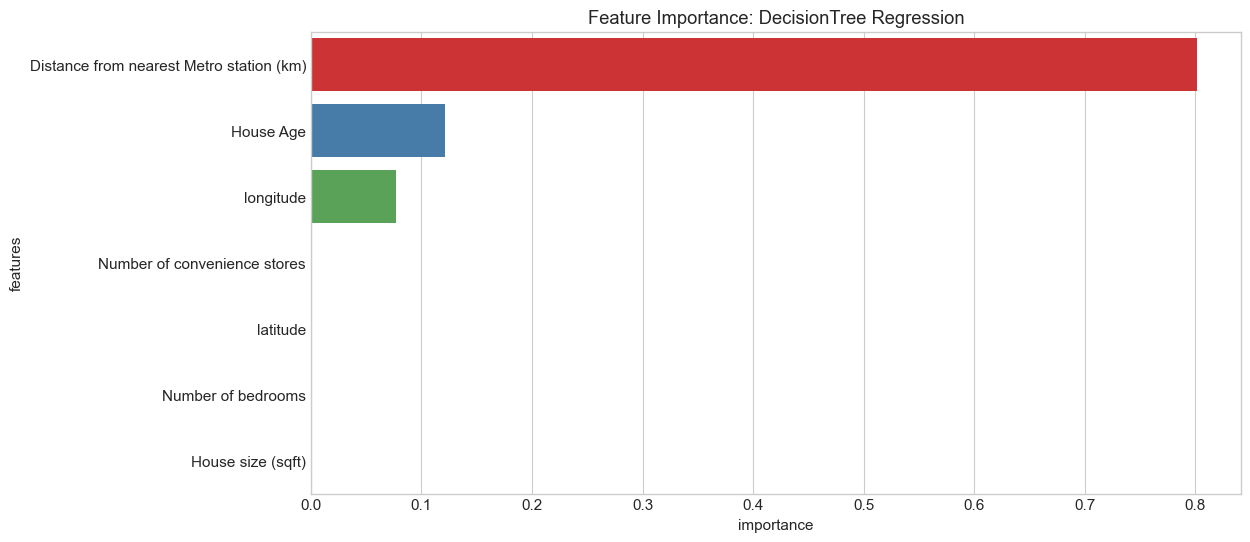

In [31]:
plt.title("Feature Importance: DecisionTree Regression")
sns.barplot(data=importance.sort_values(by='importance', ascending=False), 
            x='importance', 
            y='features', 
            palette='Set1'
           )

plt.show()

In [32]:
# -- Feature Importance by RandomForest --
importance_forest = pd.DataFrame({'features': train_inputs.columns,
                                  'importance': forest.feature_importances_
                                 }
                                )
importance_forest.head(10).sort_values(by='importance', 
                                       ascending=False
                                      ).style.highlight_max(axis=0)

,features,importance
1,Distance from nearest Metro station (km),0.799841
3,latitude,0.095046
0,House Age,0.078788
4,longitude,0.026325
2,Number of convenience stores,0.000000
5,Number of bedrooms,0.000000
6,House size (sqft),0.000000


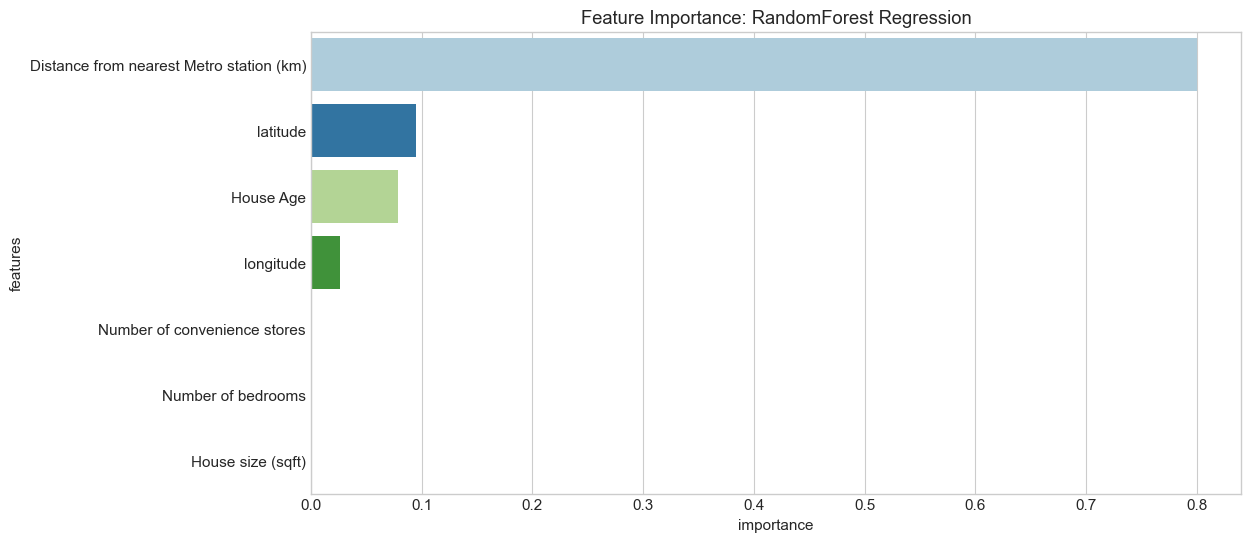

In [33]:
plt.title("Feature Importance: RandomForest Regression")
sns.barplot(data=importance_forest.sort_values(by='importance', ascending=False), 
            x='importance', 
            y='features', 
            palette='Paired'
           )
plt.show()

## Random Forest regression with features selection and parameters tunning.

In [34]:
important_features = ["Distance from nearest Metro station (km)", 
                      "House Age", 
                      "latitude", 
                      "longitude"
                     ]

train_inputs[important_features].head()

,Distance from nearest Metro station (km),House Age,latitude,longitude
192,-0.814143,2.292652,-0.123441,0.478119
234,0.898572,-0.853573,-0.722866,-1.288509
5,0.865586,-0.932668,-0.482451,-1.358313
45,-0.472056,1.659892,0.090352,0.755378
245,-0.352429,-0.897514,0.286395,0.964137


In [35]:
params = {"max_depth": 8, 
          "min_samples_split": 3,
          "max_features": 5,
          "random_state": 13
         }

In [36]:
new_forest = RandomForestRegressor(**params).fit(train_inputs[important_features], train_target)

model_metrics(train_inputs[important_features], train_target, new_forest, "Train set")
model_metrics(test_inputs[important_features], test_target, new_forest, "Test set")

---- Train set ----
RMSE: 0.302
Accuracy: 0.927
R2 score: 0.927
---- Test set ----
RMSE: 0.461
Accuracy: 0.831
R2 score: 0.831


## Gradient Boosting algorithm:

In [37]:
grd_boosting = GradientBoostingRegressor(random_state=42).fit(train_inputs[important_features], train_target)

model_metrics(train_inputs[important_features], train_target, grd_boosting, "Train set")
model_metrics(test_inputs[important_features], test_target, grd_boosting, "Test set")

---- Train set ----
RMSE: 0.312
Accuracy: 0.922
R2 score: 0.922
---- Test set ----
RMSE: 0.462
Accuracy: 0.830
R2 score: 0.830


In [38]:
grd_boosting2 = GradientBoostingRegressor(**params).fit(train_inputs[important_features], train_target)

model_metrics(train_inputs[important_features], train_target, grd_boosting2, "Train set")
model_metrics(test_inputs[important_features], test_target, grd_boosting2, "Test set")

---- Train set ----
RMSE: 0.100
Accuracy: 0.992
R2 score: 0.992
---- Test set ----
RMSE: 0.542
Accuracy: 0.766
R2 score: 0.766


## Cross Validation: 

In [39]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(new_forest, test_inputs, test_target, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)

scores = np.absolute(scores)
mean_score = np.mean(scores)

print(f"mean absolute error: {mean_score:.3f}")

mean absolute error: 0.459


## Results:



### Linear Models:

- __Assumptions:__ Linear models tries to find a linear relation ship between feature & target.
- Since the target column doesn't have that linear graph campared with other features of the dataset.
- Therefore Linear models such as Linear Regression, Ridge and Lasso aren't fitting well, resulting in overfitting and underfitting the model.


### Non Linear Models:
- __Assumptions:__ None linear models best suited for non linear datasets / features.
- Decision Tree, RandomForest and Gradient boosting algorithms are working better than the linear models.



### RandomForest Regression:
- Above all the models __RandomForest regression__ with __hyperparameters tunning__ showing better results on validation dataset and generalizes well.
- __Root mean squared error:__ 46% - metric used for the errors estimation.
- __Accuracy of the model:__ 83%


- Since the dataset is already too small; I think we should gather more data and train using the best model, definitely we'll get much better results.